## Breakdown of this notebook:

<b> 1. Loading the dataset:</b> Load the data and import the libraries

<b> 2. Data Cleaning: </b>

- Deleting redundant columns
- Renaming the columns
- Dropping duplicates
- Cleaning individual columns
- Remove the NaN values from the dataset

## Some Transformations

<b> 3. Regression Analysis </b>
- Linear Regression
- Decision Tree Regression
- Random Forest Regression

<b> 4. Data Visualisation: </b> Using plots to find relations between the features
- Restaurants delivering online or not
- Restaurants allowing table booking or not
- Table booking rate vs rate
- Best Location
- Relation between location and rating
- Restaurant type
- Gaussian rest type and rating
- Types of Services
- Relation between Type and rating
- Cost of Restaurant
- No. of restaurants in a location
- Most famous restaurant chains in Bengaluru

<center> <b> The basic idea is analysing the <FONT COLOR = "BLUE"> Business Problem of Zomato </FONT> to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant and many more.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
zomato_real = pd.read_csv('zomato.csv')

In [3]:
zomato_real.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
zomato_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
# Deleting unnecessary columns
zomato = zomato_real.drop(['url', 'dish_liked', 'phone'], axis = 1) # Dropping the columns 'url','dish_liked','phone' and saving the dataset as zomato

In [6]:
# Removing the duplicates
zomato.duplicated().sum()

43

In [7]:
zomato.drop_duplicates(inplace = True)

In [8]:
# Remove NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how = 'any', inplace = True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [9]:
# Reading column names
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [10]:
# Changing the column names
zomato = zomato.rename(columns = {'approx_cost(for two people)':'cost', 'listed_in(type)': 'type', 'listed_in(city)': 'city'})
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [11]:
# Some Transformations
zomato['cost'] = zomato['cost'].astype(str) # Changing the cost to string
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.')) # Using lambda function to replace ',' with '.'
zomato['cost'] = zomato['cost'].astype(float) # Changing the cost to float
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [12]:
# Reading rate of dataset
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
# Removing '/5' from the rates
zomato = zomato.loc[zomato.rate != 'NEW']
zomato = zomato.loc[zomato.rate != '-'].reset_index(drop = True)
remove_slash = lambda x: x.replace('/5','') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [14]:
# Adjust the column names
zomato.name = zomato.name.apply(lambda x: x.title())
zomato.online_order.replace(('Yes','No'),(True, False), inplace = True)
zomato.book_table.replace(('Yes','No'),(True, False), inplace = True)
zomato.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

In [15]:
# Encode the input variables
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate','cost','votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

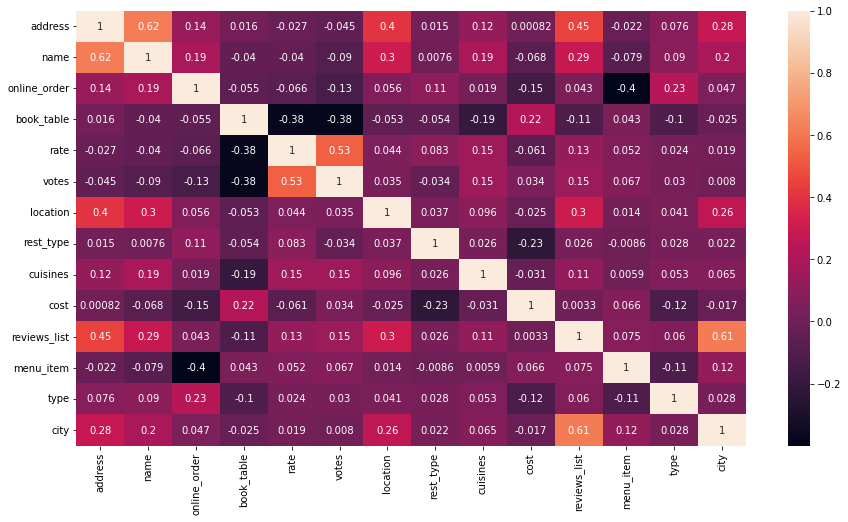

In [16]:
# Get correlation between different variables
corr = zomato_en.corr(method = 'kendall')
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True)
plt.savefig("correlation.png")
zomato_en.columns

<center> <h5> The highest correlation is 0.62 between name and address which is not very much of our concern </h5> </center>

## Regression Analysis

### Splitting the Dataset

In [17]:
# Defining the independant variables and dependant variables 
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['rate']
x.columns

Index(['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'cuisines', 'cost', 'menu_item'],
      dtype='object')

In [18]:
# Getting Test and Training Set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 353)
x_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
16950,0,1,0,8,2,5,250.0,0
767,0,1,131,8,4,278,400.0,190
6750,0,1,137,45,2,1295,250.0,0
9471,0,1,74,16,0,537,1.0,0
25162,0,1,61,12,2,1860,350.0,0


In [19]:
y_train.head()

16950    3.9
767      3.7
6750     4.0
9471     3.8
25162    3.7
Name: rate, dtype: float64

## Linear Regression

In [20]:
# Prepare a Linear Regression model
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.27362337221039335

## Decision Tree Regression

In [21]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8541006332674862

## Random Forest Regression

In [22]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8774279501872895

### Extra Tree Regression

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
ETree = ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train, y_train)
y_predict = ETree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.9399589246913611

## Data Visualization

 ### Restaurants delivering online or not

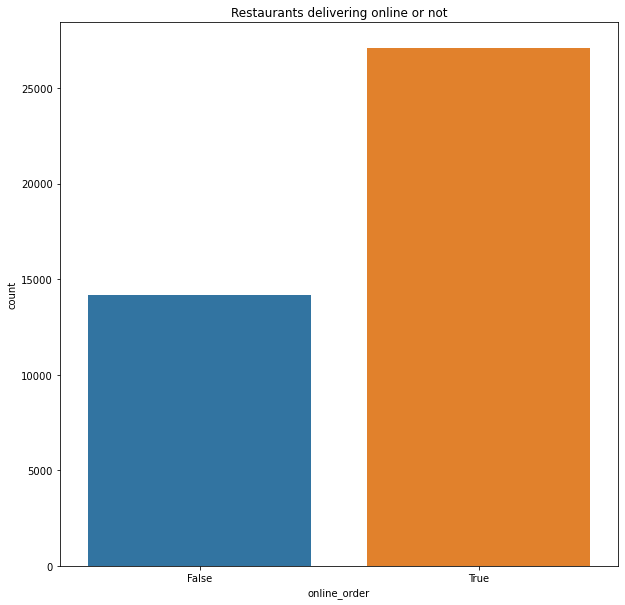

In [24]:
sns.countplot(zomato['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or not')
plt.savefig("online.png")

### Restaurants allowing table booking or not

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

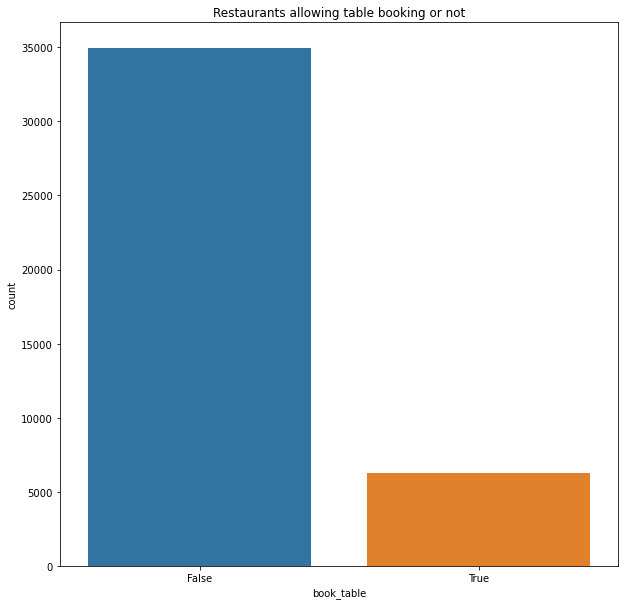

In [26]:
sns.countplot(zomato['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.savefig("Book_Table.png")
plt.title("Restaurants allowing table booking or not")

### Table booking rate vs rate

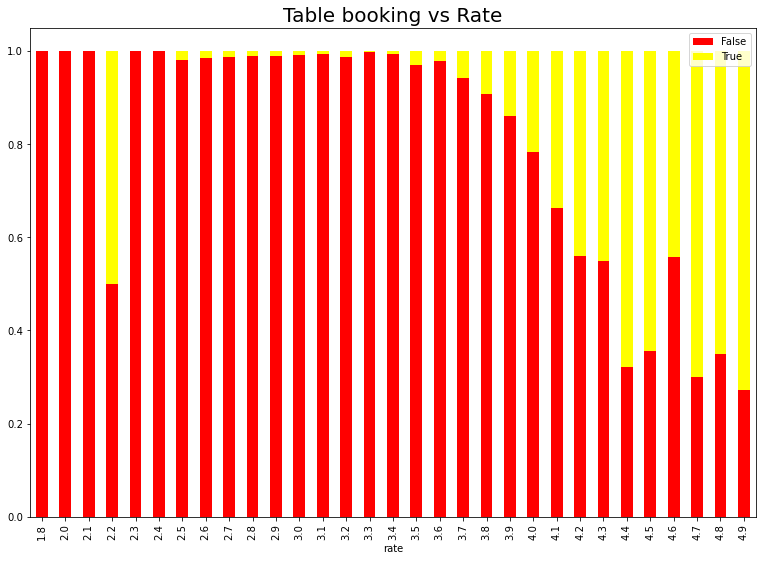

In [28]:
plt.rcParams['figure.figsize'] = (13,9)
Y = pd.crosstab(zomato['rate'], zomato['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['red','yellow'])
plt.title('Table booking vs Rate', fontweight = 30, fontsize = 20)
plt.legend(loc = "upper right")
plt.savefig("Table_Booking_Rate.png")
plt.show()

#### Location

Text(0.5, 1.0, 'Location')

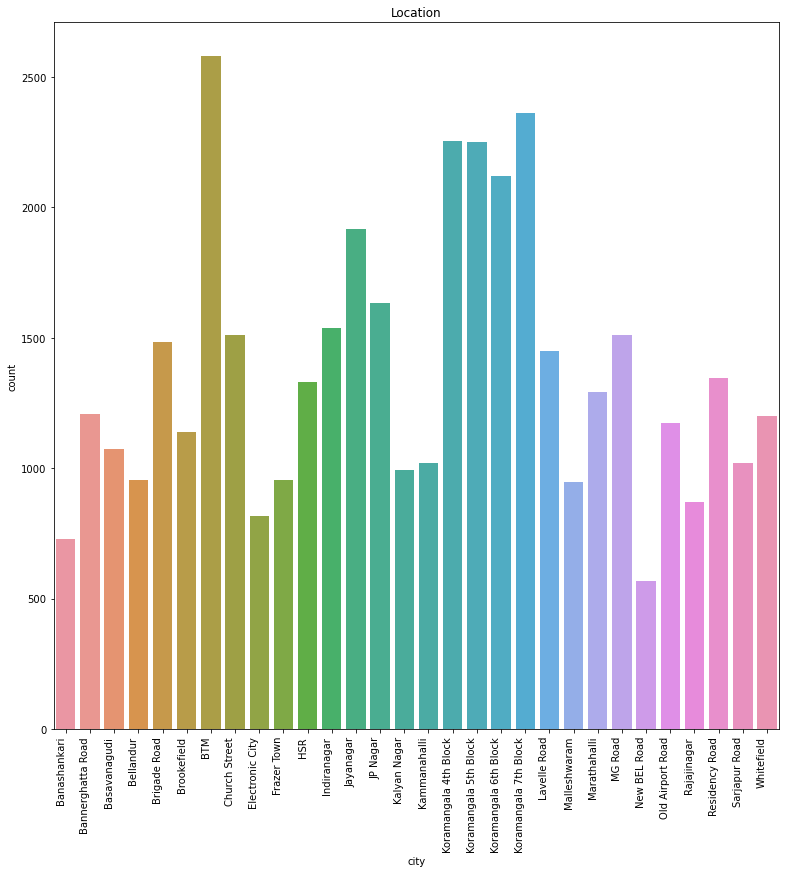

In [29]:
sns.countplot(zomato['city'])
sns.countplot(zomato['city']).set_xticklabels(sns.countplot(zomato['city']).get_xticklabels(), rotation = 90, ha = "right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.savefig("Location.png")
plt.title('Location')

#### Location and Rating

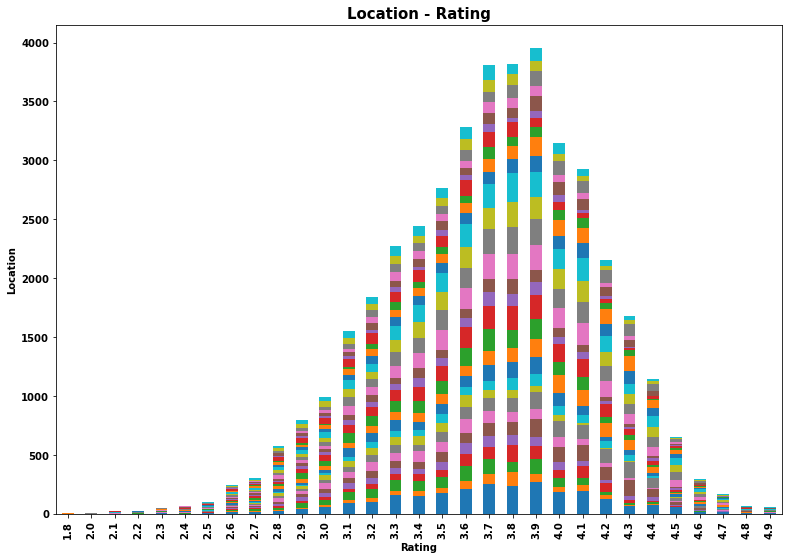

In [30]:
loc_plt = pd.crosstab(zomato['rate'],zomato['city'])
loc_plt.plot(kind = 'bar', stacked = True);
plt.title('Location - Rating', fontsize = 15, fontweight = 'bold')
plt.ylabel('Location', fontsize = 10, fontweight = 'bold')
plt.xlabel('Rating', fontsize = 10, fontweight = 'bold')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold');
plt.legend().remove();
plt.savefig("Location Rating.png")

#### Restaurant Type

Text(0.5, 1.0, 'Restaurant Type')

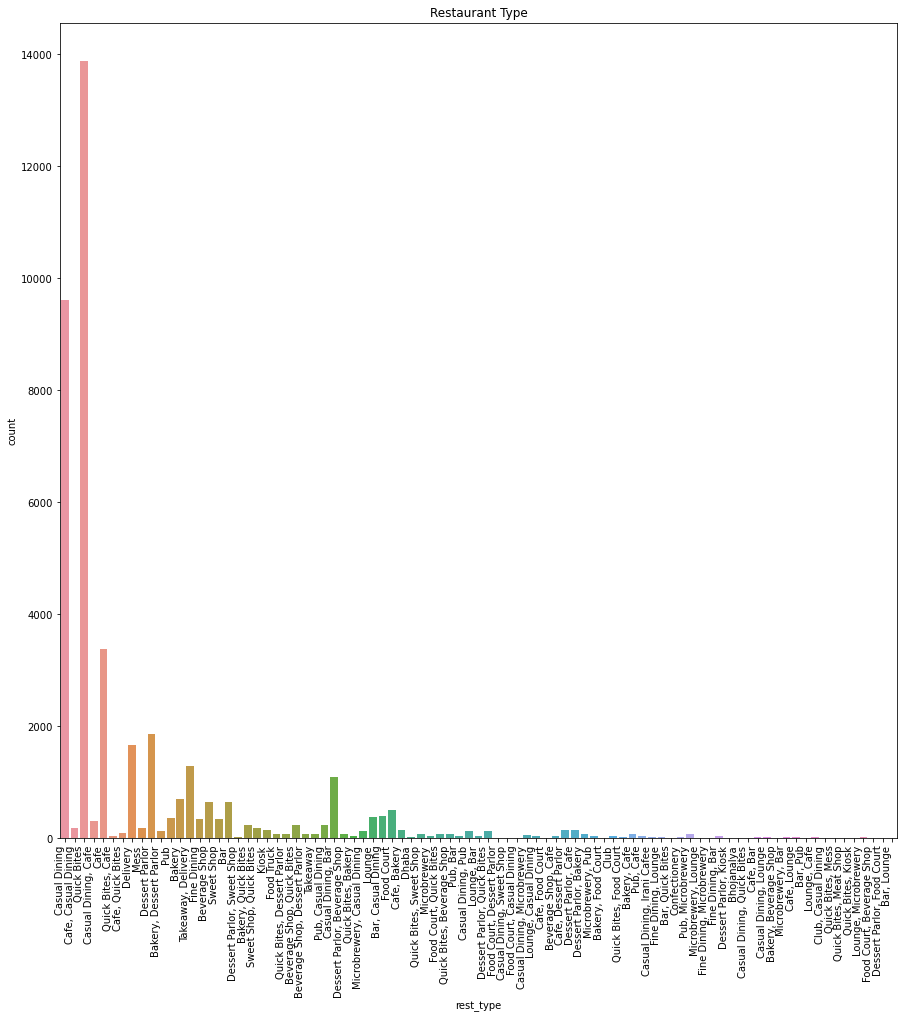

In [31]:
sns.countplot(zomato['rest_type'])
sns.countplot(zomato['rest_type']).set_xticklabels(sns.countplot(zomato['rest_type']).get_xticklabels(), rotation = 90, ha = "right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.savefig("Restaurant Type.png")
plt.title("Restaurant Type")

#### Gaussian Rest Type and Rating

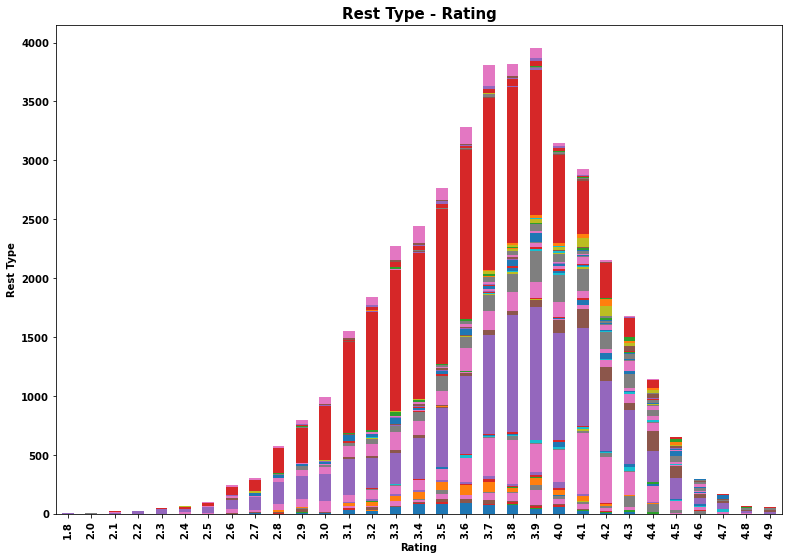

In [32]:
loc_plt = pd.crosstab(zomato['rate'], zomato['rest_type'])
loc_plt.plot(kind = 'bar', stacked = True);
plt.title('Rest Type - Rating', fontsize = 15, fontweight = 'bold')
plt.ylabel('Rest Type', fontsize = 10, fontweight = 'bold')
plt.xlabel('Rating', fontsize = 10, fontweight = 'bold')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold');
plt.legend().remove();
plt.savefig('Rest Type-Rating.png')

#### Types of Services

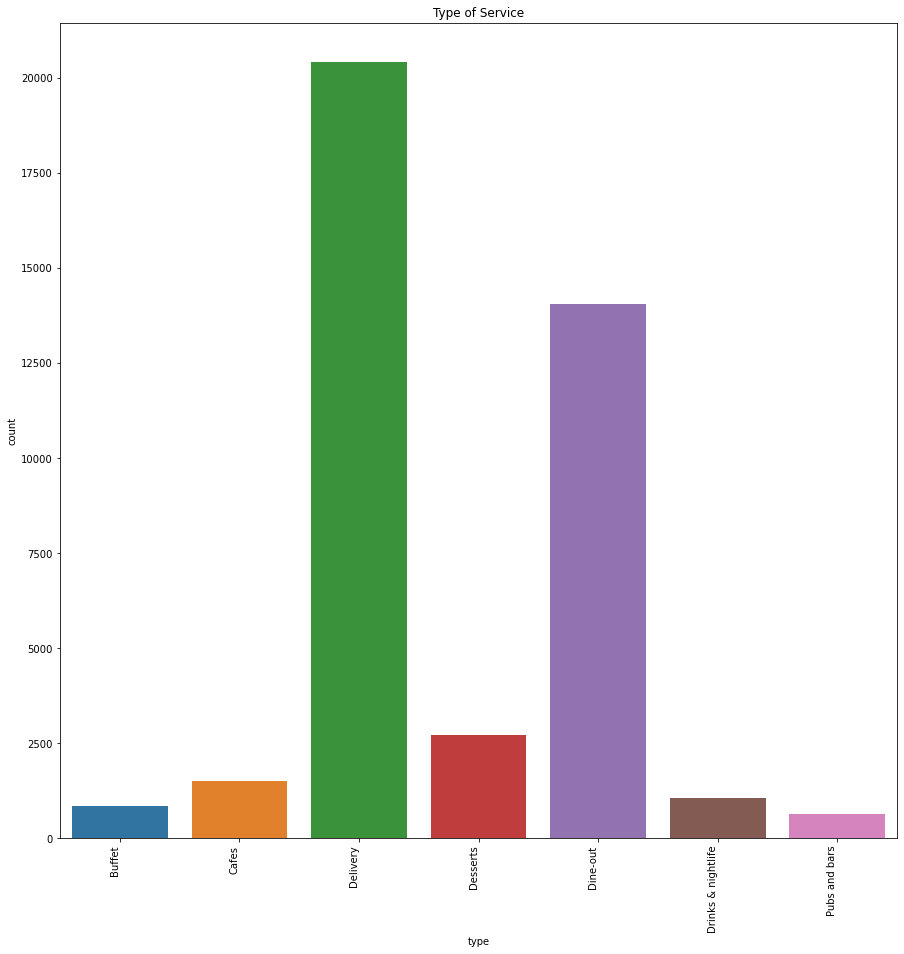

In [33]:
sns.countplot(zomato['type'])
sns.countplot(zomato['type']).set_xticklabels(sns.countplot(zomato['type']).get_xticklabels(), rotation = 90, ha = "right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')
plt.savefig('Type of Service.png')

#### Type and Rating

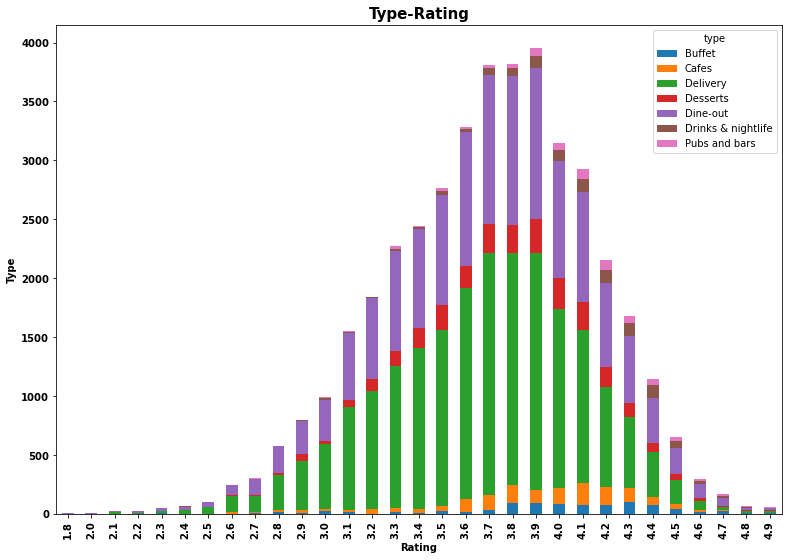

In [34]:
type_plt = pd.crosstab(zomato['rate'], zomato['type'])
type_plt.plot(kind = 'bar', stacked = True);
plt.title('Type-Rating', fontsize = 15, fontweight = 'bold')
plt.ylabel('Type', fontsize = 10, fontweight = 'bold')
plt.xlabel('Rating', fontsize = 10, fontweight = 'bold')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')
plt.savefig("Type and Rating")

#### Cost of Restaurant

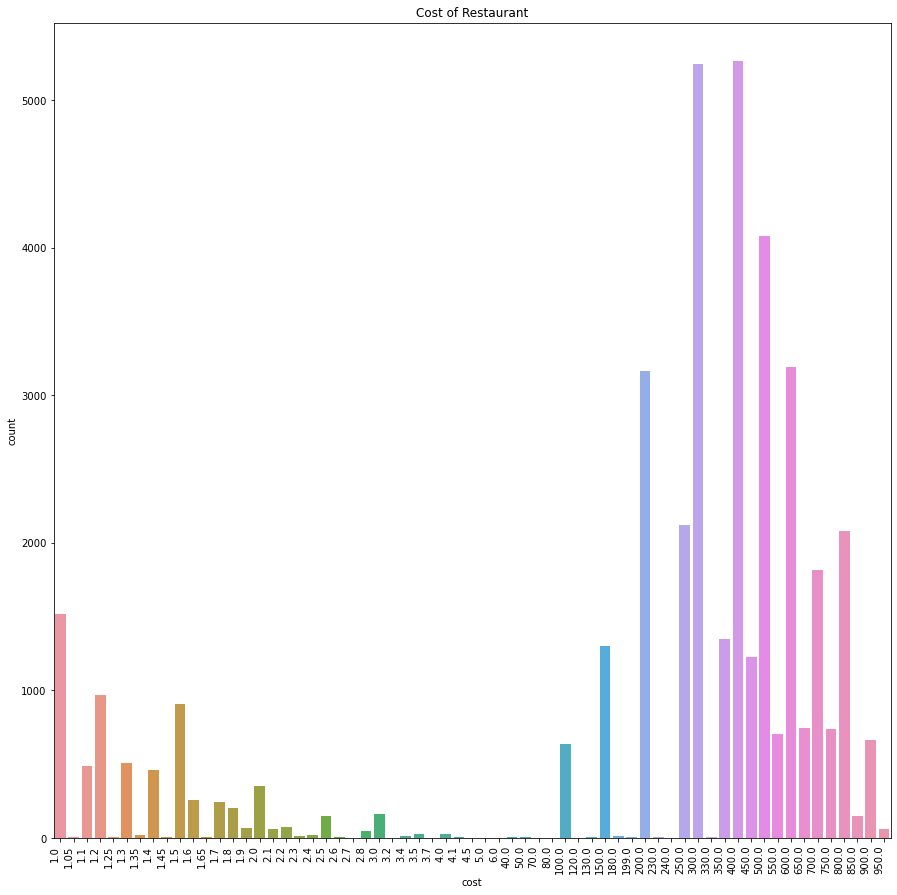

In [35]:
sns.countplot(zomato['cost'])
sns.countplot(zomato['cost']).set_xticklabels(sns.countplot(zomato['cost']).get_xticklabels(), rotation = 90, ha = "right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restaurant')
plt.savefig('Cost of Restaurant.png')

#### No. of Restaurants in a Location

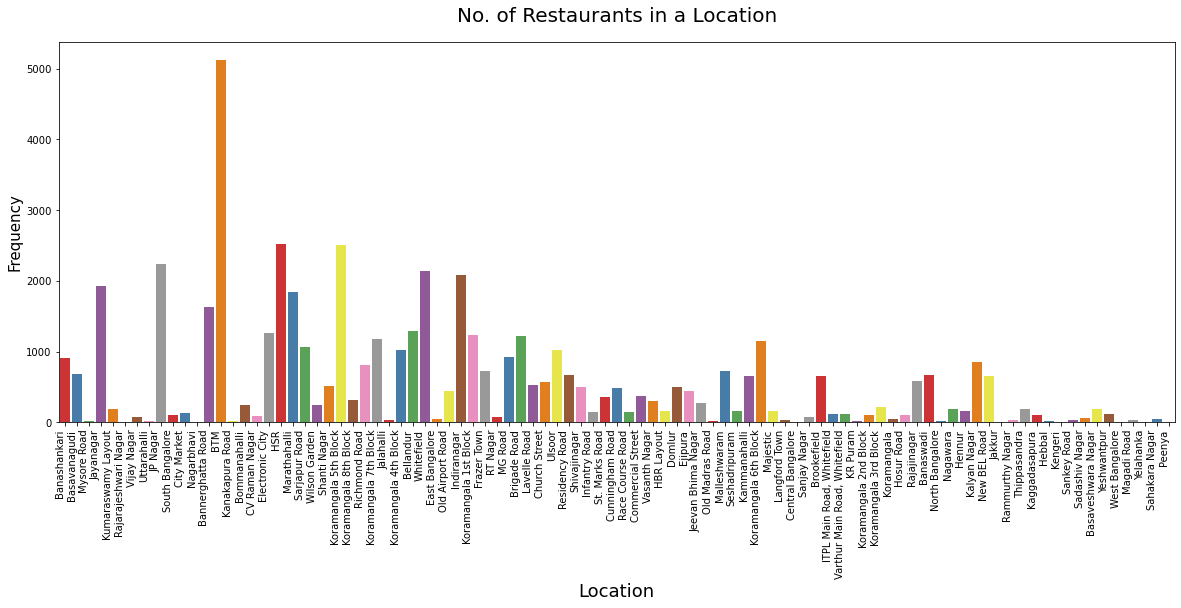

In [36]:
fig = plt.figure(figsize = (20,7))
loc = sns.countplot(x = 'location',data = zomato_real, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation = 90, ha = "right")
plt.ylabel("Frequency", size = 15)
plt.xlabel("Location", size = 18)
loc
plt.title('No. of Restaurants in a Location', size = 20, pad = 20)
plt.savefig("Restaurants in Location")

#### Restaurant Type

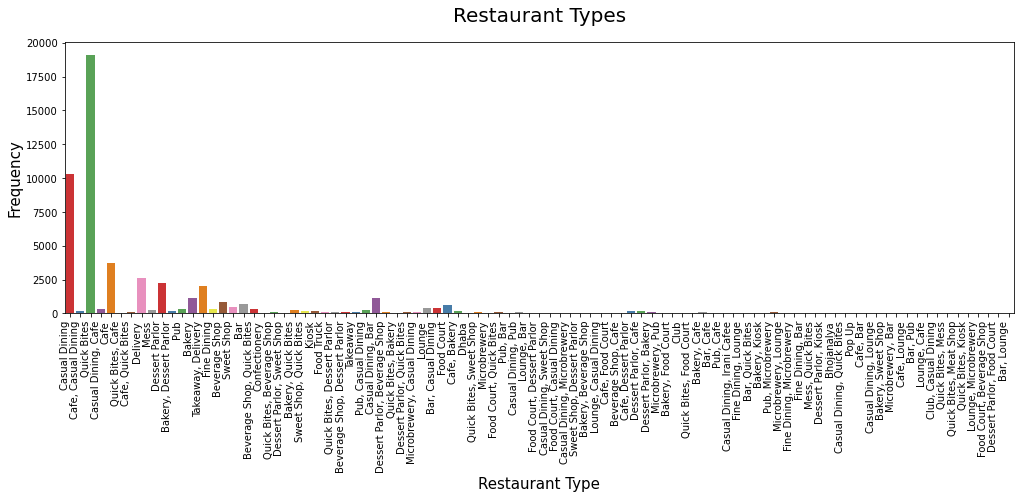

In [37]:
fig = plt.figure(figsize = (17,5))
rest = sns.countplot(x = "rest_type", data = zomato_real, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation = 90, ha = 'right')
plt.ylabel('Frequency', size = 15)
plt.xlabel('Restaurant Type', size = 15)
rest
plt.title('Restaurant Types', fontsize = 20, pad = 20)
plt.savefig('Restaurant Types.png')

#### Most famous Restaurant chains in Bangalore

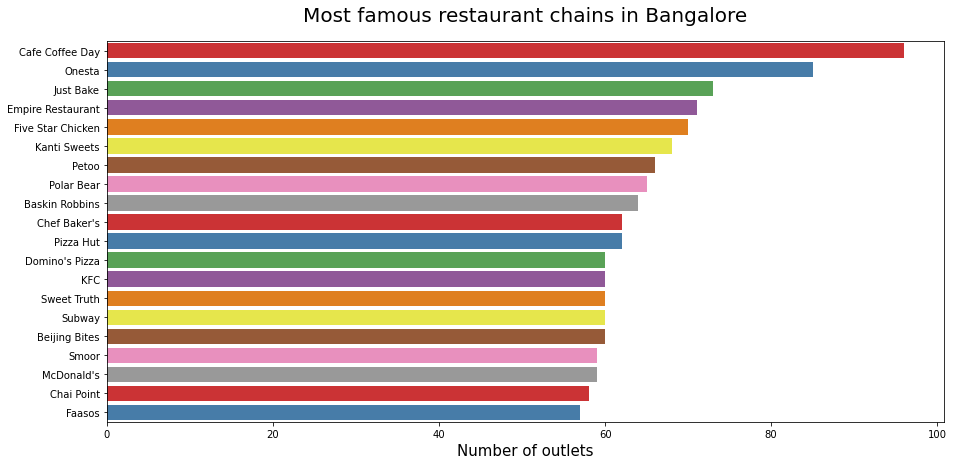

In [38]:
plt.figure(figsize = (15,7))
chains = zomato_real['name'].value_counts()[:20]
sns.barplot(x = chains, y = chains.index, palette = "Set1")
plt.title("Most famous restaurant chains in Bangalore", size = 20, pad = 20)
plt.xlabel('Number of outlets', size = 15)
plt.savefig('Most famous restaurant chains')